# Setup

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import fiona

In [5]:
gdb_file = "ECMC_CSM_Flowline_Data_Access/COGCC_Form44_Off_Location_Flowlines_Approved_CONFIDENTIAL.gdb"
gdf = gpd.read_file(gdb_file)

## Explore Data

In [6]:
# Listing layers in GDB
print(fiona.listlayers(gdb_file))

['Off_Location_Flowlines', 'Off_Location_Flowline_Valves']


In [7]:
# General Info
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 150722 entries, 0 to 150721
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Operator      150722 non-null  object  
 1   Fluid         144453 non-null  object  
 2   Material      141456 non-null  object  
 3   Diam_in       89595 non-null   float64 
 4   Status        113343 non-null  object  
 5   Length_ft     150722 non-null  float64 
 6   Doc_Num       150722 non-null  int64   
 7   SHAPE_Length  150722 non-null  float64 
 8   geometry      150722 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 10.3+ MB
None


In [8]:
# Preview Data
print(gdf.head())

                          Operator       Fluid      Material  Diam_in  \
0  EVERGREEN NATURAL RESOURCES LLC         Gas         polly      4.0   
1                 NOBLE ENERGY INC  Multiphase  Carbon Steel      3.0   
2                   PDC ENERGY INC        None          None      NaN   
3                 NOBLE ENERGY INC         Gas  Carbon Steel      3.0   
4                 NOBLE ENERGY INC  Multiphase  Carbon Steel      3.0   

                        Status  Length_ft    Doc_Num  SHAPE_Length  \
0                       Active    2277.71  403322934    693.972162   
1                    Abandoned     651.58  402501867    198.525215   
2  Partial Removed see comment    1902.59  402839937    579.687012   
3                       Active     205.62  402501867     62.649840   
4                       Active    2069.90  402263524    630.658768   

                                            geometry  
0  MULTILINESTRING ((524642.670 4117088.796, 5246...  
1  MULTILINESTRING ((527997.28

In [9]:
# Statistical Summary
print(gdf.describe())

            Diam_in      Length_ft       Doc_Num   SHAPE_Length
count  89595.000000  150722.000000  1.507220e+05  150722.000000
mean       3.725341    1306.579490  4.026265e+08     398.438430
std        3.130543    2062.784059  3.404456e+05     630.166487
min        0.000000       0.000000  4.016109e+08       0.000000
25%        2.000000     414.370000  4.022635e+08     126.291510
50%        3.000000     922.210000  4.025857e+08     281.006646
75%        4.000000    1669.460000  4.028833e+08     508.899994
max      278.000000  142105.980000  4.035153e+08   43297.057874


## Visualization

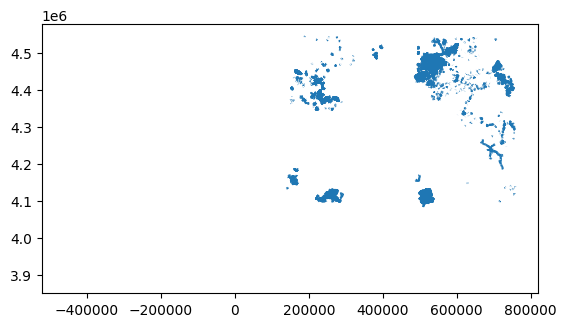

In [10]:
# Basic Plot
gdf.plot()
plt.show()

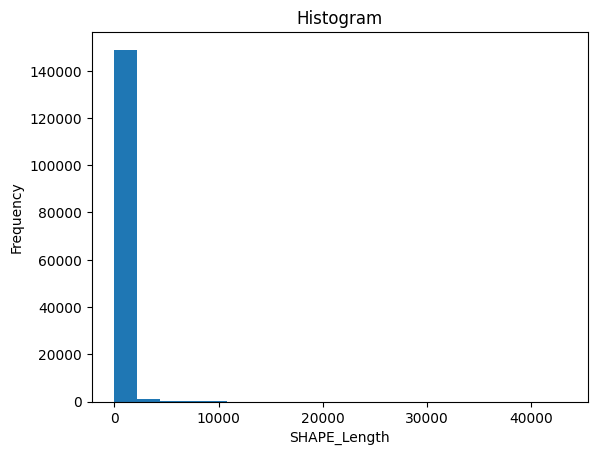

In [11]:
# Histogram
gdf['SHAPE_Length'].plot(kind='hist', bins=20)
plt.xlabel('SHAPE_Length')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

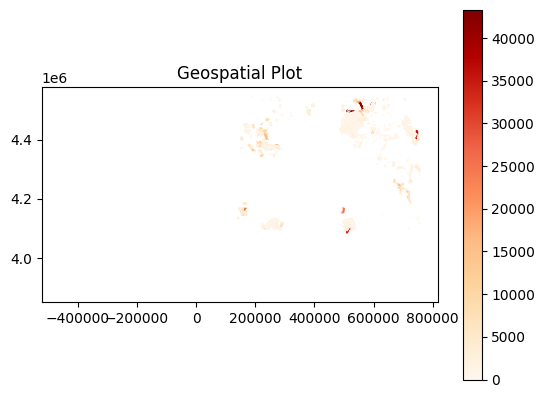

In [12]:
gdf.plot(column='SHAPE_Length', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()

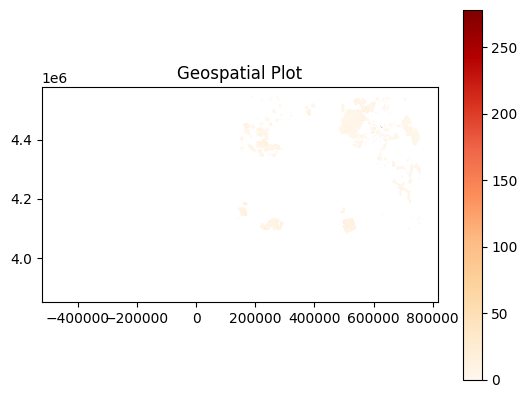

In [15]:
gdf.plot(column='Diam_in', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()

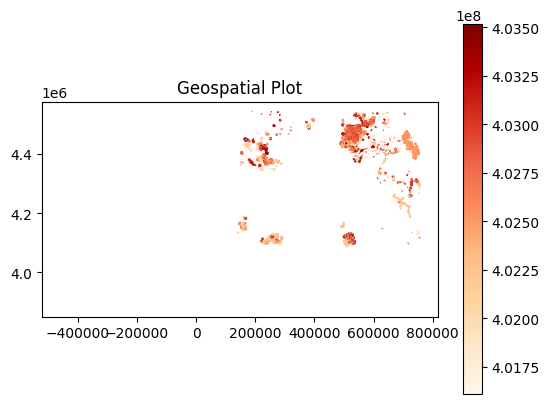

In [16]:
gdf.plot(column='Length_ft', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()

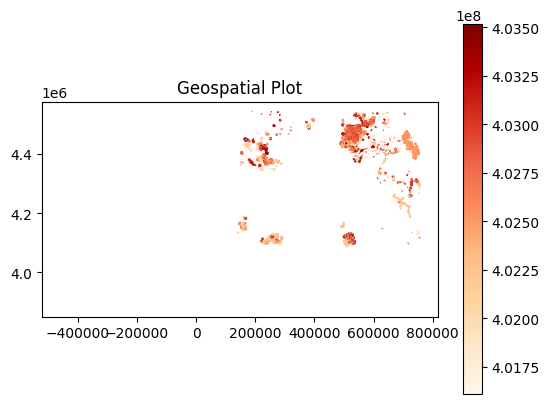

In [17]:
gdf.plot(column='Doc_Num', cmap='OrRd', legend=True)
plt.title('Geospatial Plot')
plt.show()

In [31]:
# Example: Buffering points and checking if other points are inside the buffer
buffer_distance = 100  # Define buffer distance in the unit of your spatial data
buffered_points = gdf['geometry'].buffer(buffer_distance)
points_inside_buffer = gdf[gdf.within(buffered_points.unary_union)]